In [3]:
import os
import PIL
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt 

In [4]:
img_prefix = '/data/DOTA_split/train/images/'

In [5]:
import json

anno = ''
with open('/data/DOTA_split/annotations/annotations_train_fixed.json') as fp:
    anno = json.loads(fp.read())


In [6]:
cat2id = {i['name']:i['id'] for i in anno['categories']}
id2cat = {i['id']:i['name'] for i in anno['categories']}

for item in id2cat.items():
    print (item)

(0, 'plane')
(1, 'ship')
(2, 'storage-tank')
(3, 'baseball-diamond')
(4, 'tennis-court')
(5, 'basketball-court')
(6, 'ground-track-field')
(7, 'harbor')
(8, 'bridge')
(9, 'large-vehicle')
(10, 'small-vehicle')
(11, 'helicopter')
(12, 'roundabout')
(13, 'soccer-ball-field')
(14, 'swimming-pool')
(15, 'container-crane')
(16, 'airport')
(17, 'helipad')


In [7]:
imgid2fname = {i['id']:i['file_name'] for i in anno['images']}

In [8]:
target_cat = 'swimming-pool'
target_catid = cat2id[target_cat]

In [9]:
target_imgids = list(set([i['image_id'] for i in anno['annotations'] if i['category_id'] == target_catid]))

In [10]:
#target_imgids = target_imgids[:50]
target_fnames = []
target_annos = []
for target_imgid in target_imgids:
    target_fnames.append(imgid2fname[target_imgid])
    target_annos.append([i for i in anno['annotations'] if i['image_id'] == target_imgid])

KeyboardInterrupt: 

In [56]:
print (len(target_fnames), len(target_annos))

2148 2148


In [57]:
target_fname = target_fnames[1]
img_fullpath = os.path.join(img_prefix,target_fname)
#img = Image.open(img_fullpath)

In [14]:
target_annos[0]

[{'area': 35088.0,
  'category_id': 16,
  'iscrowd': 0,
  'bbox': [39, 150, 408, 86],
  'image_id': 36866,
  'id': 167111},
 {'area': 1302.0,
  'category_id': 6,
  'iscrowd': 0,
  'bbox': [26, 381, 31, 42],
  'image_id': 36866,
  'id': 167112}]

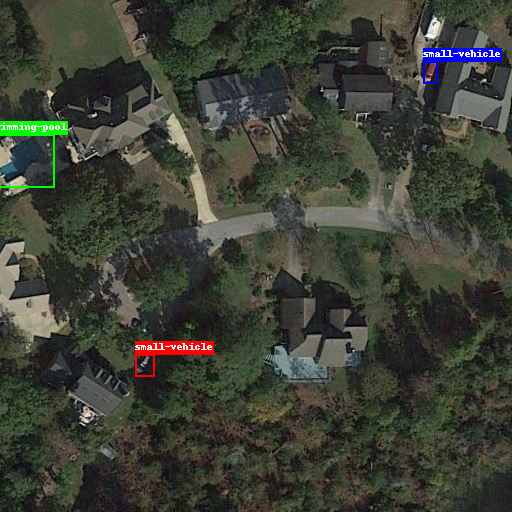

In [58]:
from PIL import Image, ImageDraw, ImageFont
import random

# Define colors for each class (18 different colors)
COLORS = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (255, 255, 0), (255, 0, 255),
    (128, 0, 0), (0, 128, 0), (0, 0, 128), (128, 128, 0), (0, 128, 128), (128, 0, 128),
    (64, 0, 0), (0, 64, 0), (0, 0, 64), (64, 64, 0), (0, 64, 128), (128, 64, 0)
]

def draw_bboxes(image_path, bboxes, classes):
    """
    Draw bounding boxes on the image.

    Parameters:
    - image_path (str): Path to the input image.
    - bboxes (list): A list of bounding boxes, where each bounding box is represented
                     as a tuple (class_id, x1, y1, x2, y2), where (x1, y1) is the top-left
                     corner and (x2, y2) is the bottom-right corner.

    Returns:
    - Image: Image with drawn bounding boxes.
    """
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Default font
    try:
        font = ImageFont.truetype("arial.ttf", 15)
    except IOError:
        font = ImageFont.load_default()
    
    # Draw each bounding box
    for i, (x1, y1, x2, y2) in enumerate(bboxes):
        color = COLORS[i]
        draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
        text = classes[i]
        text_w, text_h = draw.textsize(text, font=font)
        draw.rectangle([x1, y1 - text_h - 2, x1 + text_w, y1], fill=color)
        draw.text((x1, y1 - text_h - 2), text, fill=(255, 255, 255), font=font)
    
    return img

# Example usage
image_path = img_fullpath
bboxes = []
classes = []
for target_anno in target_annos[1]:
    _bbox = target_anno['bbox']
    bbox = [_bbox[0], _bbox[1], _bbox[0]+_bbox[2], _bbox[1]+_bbox[3]]
    bboxes.append(bbox)
    classes.append(id2cat[target_anno['category_id']])
img_with_bboxes = draw_bboxes(image_path, bboxes, classes)
img_with_bboxes.show()


In [59]:
def crop_image(image, x, y, final_image, xsize=None, ysize=None):
    indexes = (x, y, x+xsize, y+ysize)
    cropped_image = image.crop(indexes)
    # cropped_image.show()
    #cropped_image.save(final_image)
    return cropped_image

cropped_imgs = []
img_fullpath = os.path.join(img_prefix,target_fname)
img = Image.open(img_fullpath)
w, h = img.size

for bbox in bboxes:
    crop_lx, crop_ly, crop_xsize, crop_ysize = bbox[0]-5, bbox[1]-5, bbox[2]-bbox[0]+10, bbox[3]-bbox[1]+10
    if crop_lx < 0:
        crop_lx = 0
    if crop_ly < 0:
        crop_ly = 0
    if crop_lx+crop_xsize > w:
        crop_xsize = w - crop_lx
    if crop_ly+crop_ysize > h:
        crop_ysize = h - crop_ly
    
    cropped_image = crop_image(img, crop_lx, crop_ly, 'final_image', crop_xsize, crop_ysize)
    cropped_imgs.append(cropped_image)

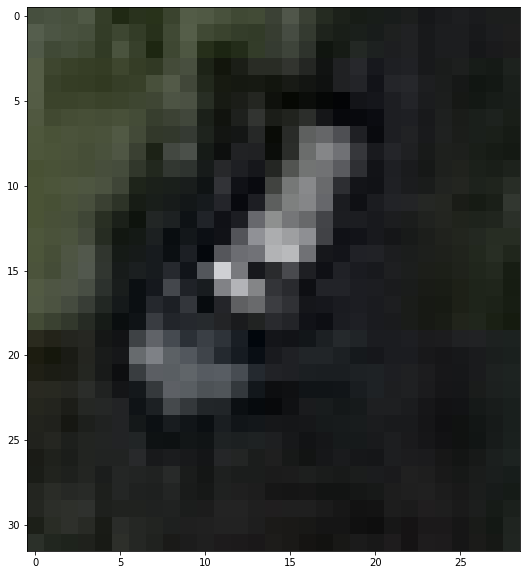

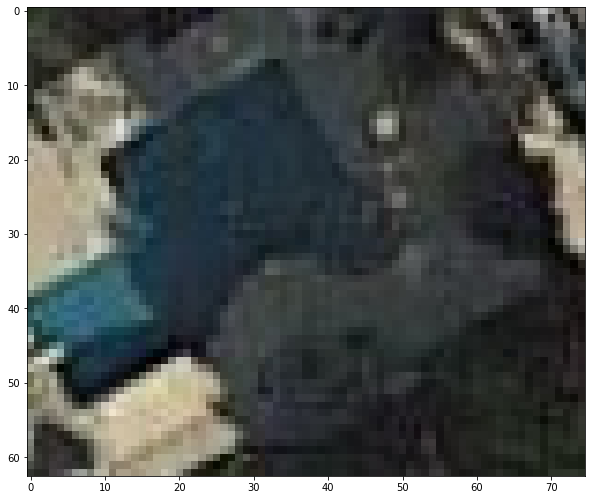

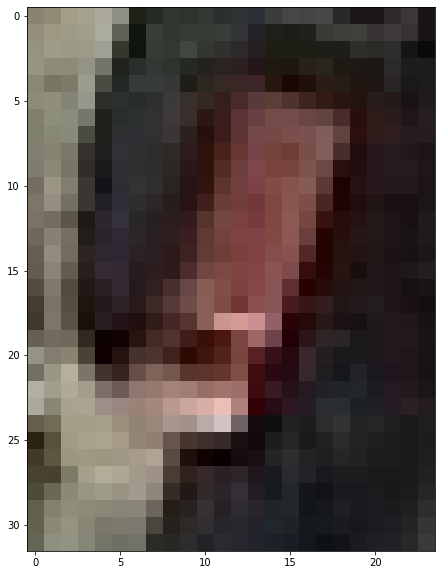

In [60]:
for cropped_img in cropped_imgs:
    plt.figure(figsize=(10,10))
    print ()
    plt.imshow(cropped_img)

In [51]:
import shutil

target_dir = '/data/DOTA_split_airport_train/imgs/'

for target_fname in target_fnames:
    img_fullpath = os.path.join(img_prefix,target_fname)
    dst_fullpath = os.path.join(target_dir, target_fname)

    shutil.copyfile(img_fullpath, dst_fullpath)